# Train Data

Importamos los paquetes y las clases necesarias para entrenar los modelos correspodientes a los Datasets 1 y 2.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from estimators.linear_regressor import LinearRegressor
from estimators.logistic_classifier import LogisticClassifier 

# Dataset 1

Como dijimos en explore, utilizaremos el modelo LinearRegressor para fittear los datos.

Training: 100%|██████████| 1000/1000 [00:01<00:00, 905.18it/s]


Dataset 1 - Linear Regression test MSE: 0.010185339518276599


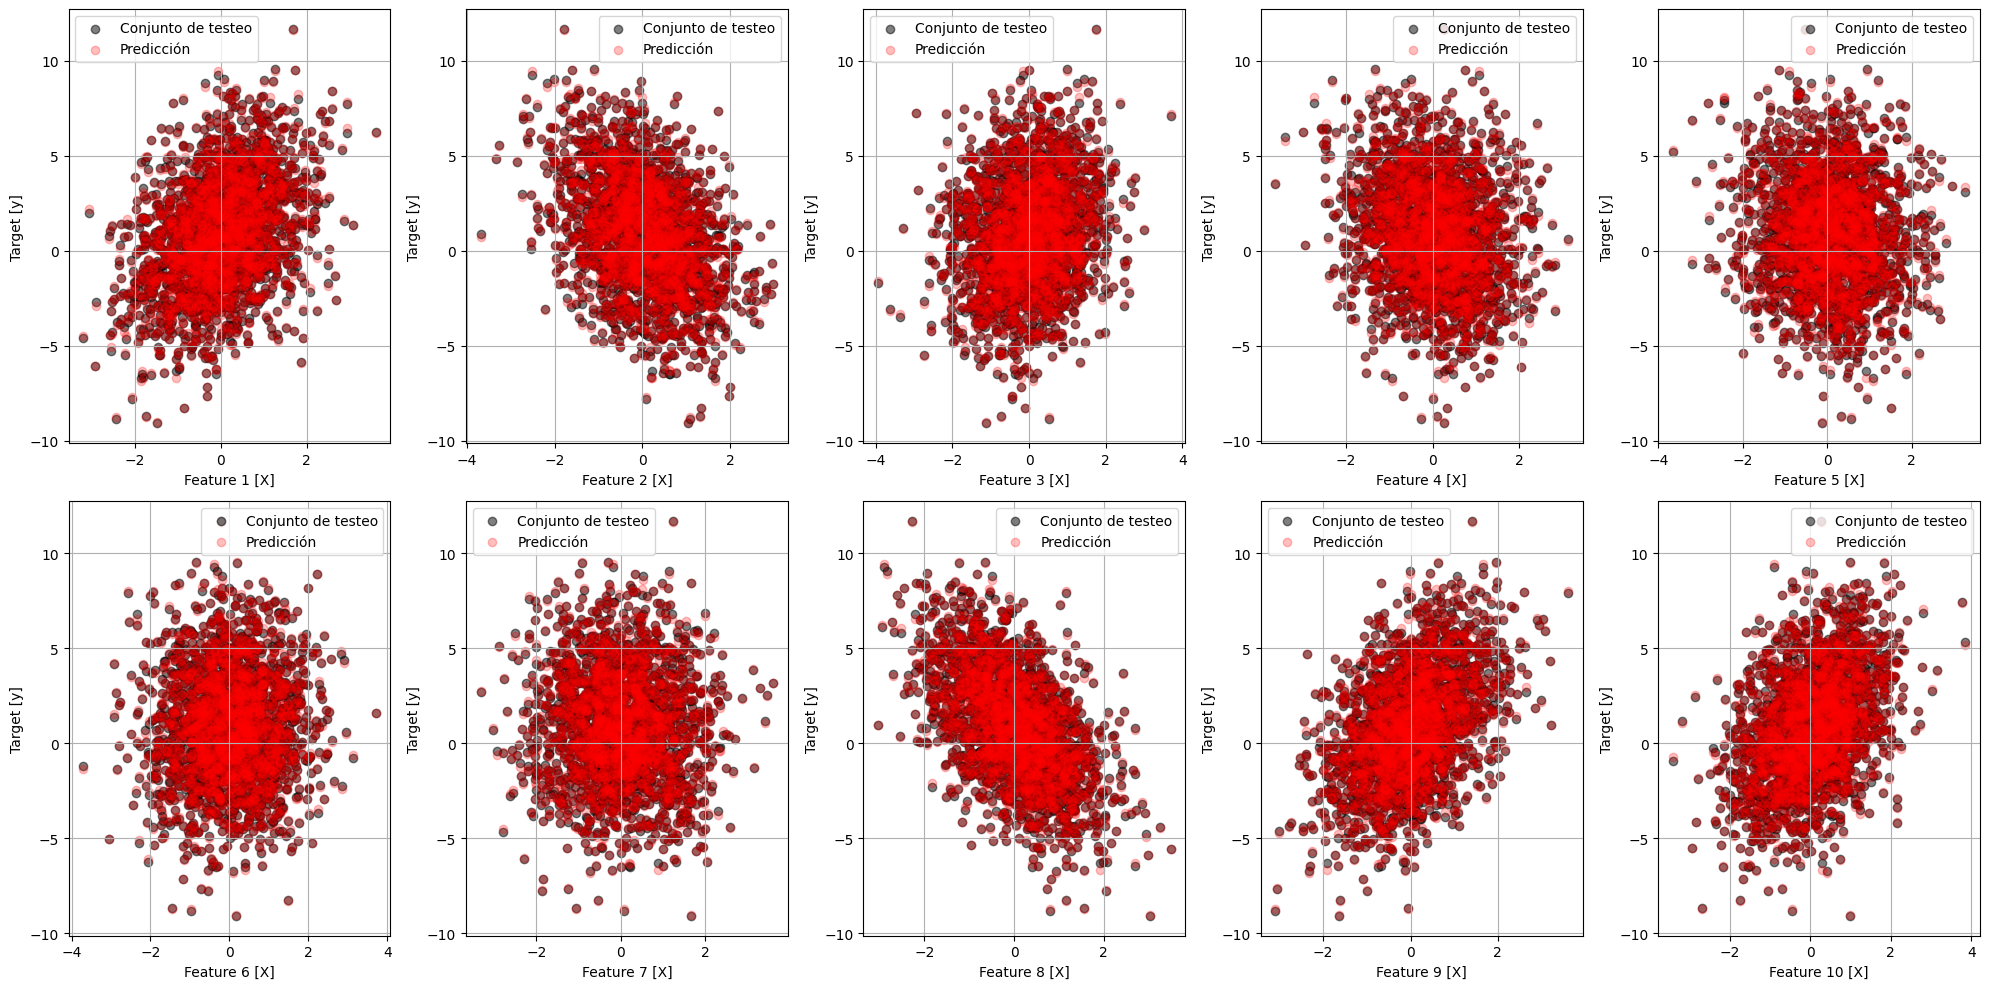

In [22]:
# Función para cargar los datos desde el archivo pickle
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data
dataset_1 = load_data("dataset_1.pkl")
X = dataset_1["X"]
y = dataset_1["y"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
linear_model = LinearRegressor(learning_rate=0.01, batch_size=100, num_epochs=1000)

# Entrenar el modelo
linear_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = linear_model.predict(X_test)

# Evaluar el rendimiento del modelos
linear_mse = mean_squared_error(y_test, y_pred)

print("Dataset 1 - Linear Regression test MSE:", linear_mse)

# Plotear X vs y
num_rows = 2 
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

axes = axes.flatten()
for i in range(X_test.shape[1]):
    ax = axes[i]
    ax.scatter(X_test[:, i], y_test, color='black', alpha = 0.5, label = 'Conjunto de testeo')
    ax.scatter(X_test[:, i], y_pred, color='red', alpha = 0.25, label = 'Predicción')
    ax.legend(loc = 'best')
    ax.set_xlabel(f'Feature {i+1} [X]')
    ax.set_ylabel(f'Target [y]')
    ax.grid(True)
plt.tight_layout()
plt.show()

# Dataset 2

Como dijimos en explore, utilizaremos el modelo LogisticClassifier para fittear los datos.

Training: 100%|██████████| 100/100 [00:00<00:00, 264.52it/s]


Dataset 2 - Logistic Classifier test accuracy: 0.9925


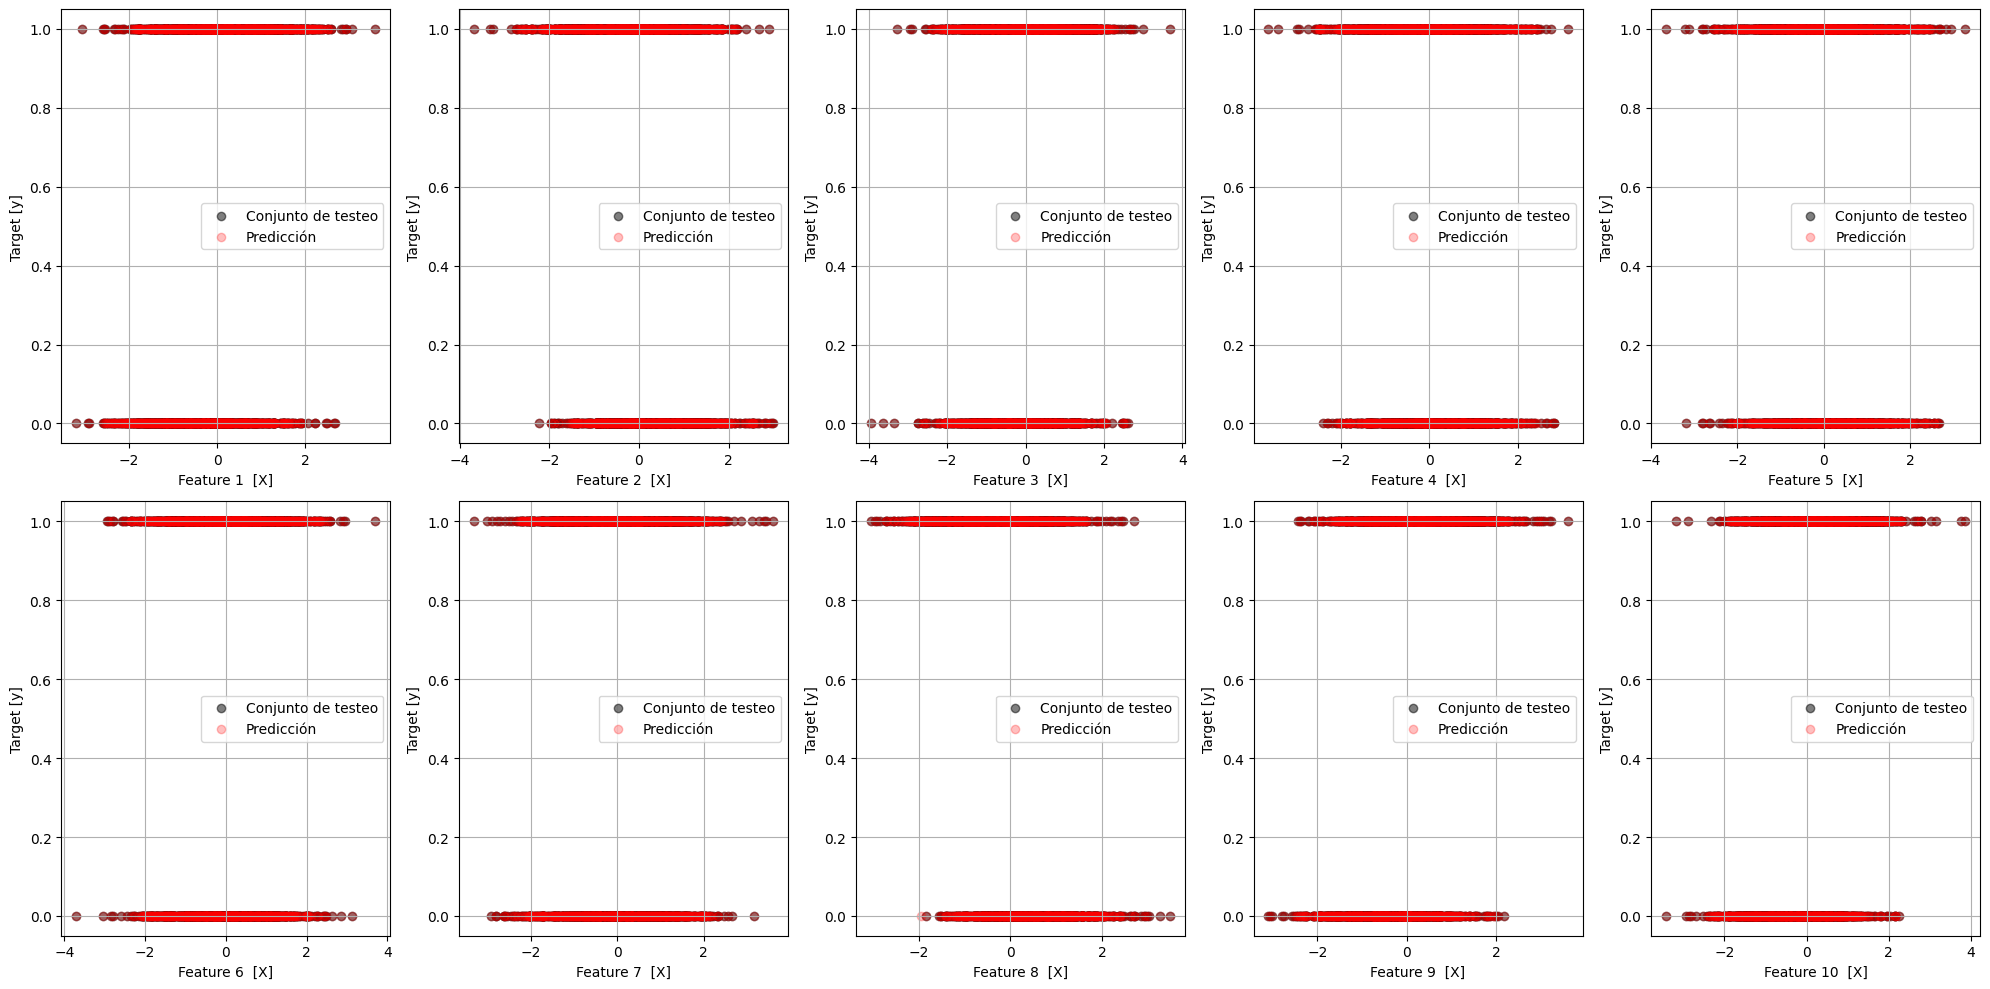

In [23]:
dataset_2 = load_data("dataset_2.pkl")
X = dataset_2["X"]
y = dataset_2["y"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
logistic_model = LogisticClassifier(learning_rate=0.01, batch_size=32, num_epochs=100)

# Entrenar el modelo
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = logistic_model.predict(X_test)

# Threshold para la predicción
y_pred = np.where(y_pred > 0.5, 1, 0)

# Evaluar el rendimiento del modelo
logistic_accuracy = accuracy_score(y_test, y_pred)

print("Dataset 2 - Logistic Classifier test accuracy:", logistic_accuracy)

# Plotear X vs y
num_rows = 2  
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

axes = axes.flatten()
for i in range(X_test.shape[1]):
    ax = axes[i]
    ax.scatter(X_test[:, i], y_test, color='black', alpha = 0.5, label = 'Conjunto de testeo')
    ax.scatter(X_test[:, i], y_pred, color='red', alpha = 0.25, label = 'Predicción')
    ax.legend(loc = 'best')
    ax.set_xlabel(f'Feature {i+1}  [X]')
    ax.set_ylabel(f'Target [y]')
    ax.grid(True)
plt.tight_layout()
plt.show()

# Dataset 3

Importamos los paquetes y las clases necesarias para entrenar los modelos correspodientes al Dataset 3. En este caso utilizaremos LinearRegressor, LogisticClassifier y GradientBoosting con modelos de árboles para fittear los datos.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from estimators.base import GradientBoostingEstimator
from estimators.tree_stump_regressor import TreeStumpRegressor
from estimators.linear_regressor import LinearRegressor
from estimators.logistic_classifier import LogisticClassifier 

# Función para cargar los datos desde el archivo pickle
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

- LinearRegressor

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Training: 100%|██████████| 1000/1000 [00:01<00:00, 819.83it/s]


Dataset 3 - Linear Regression test MSE: 5.781146604678799
Dataset 3 - Linear Regression train MSE: 6.083664176366287


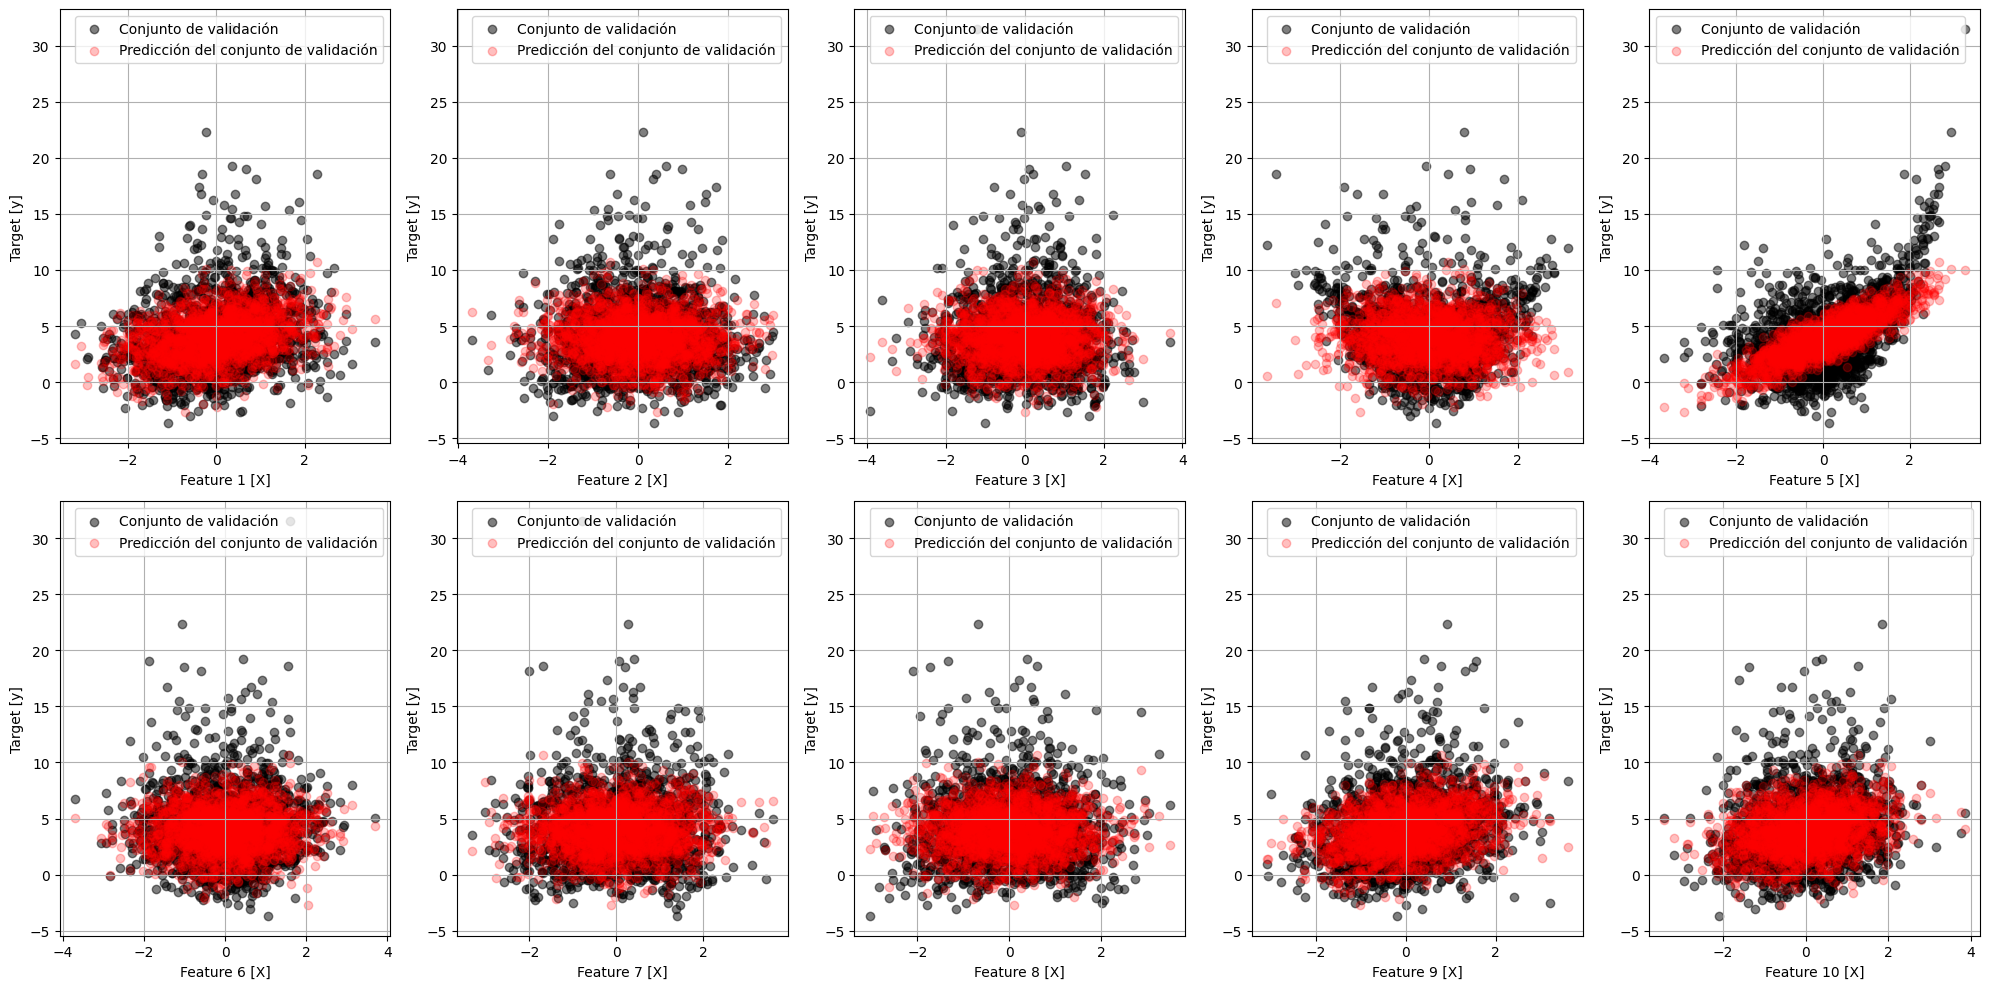

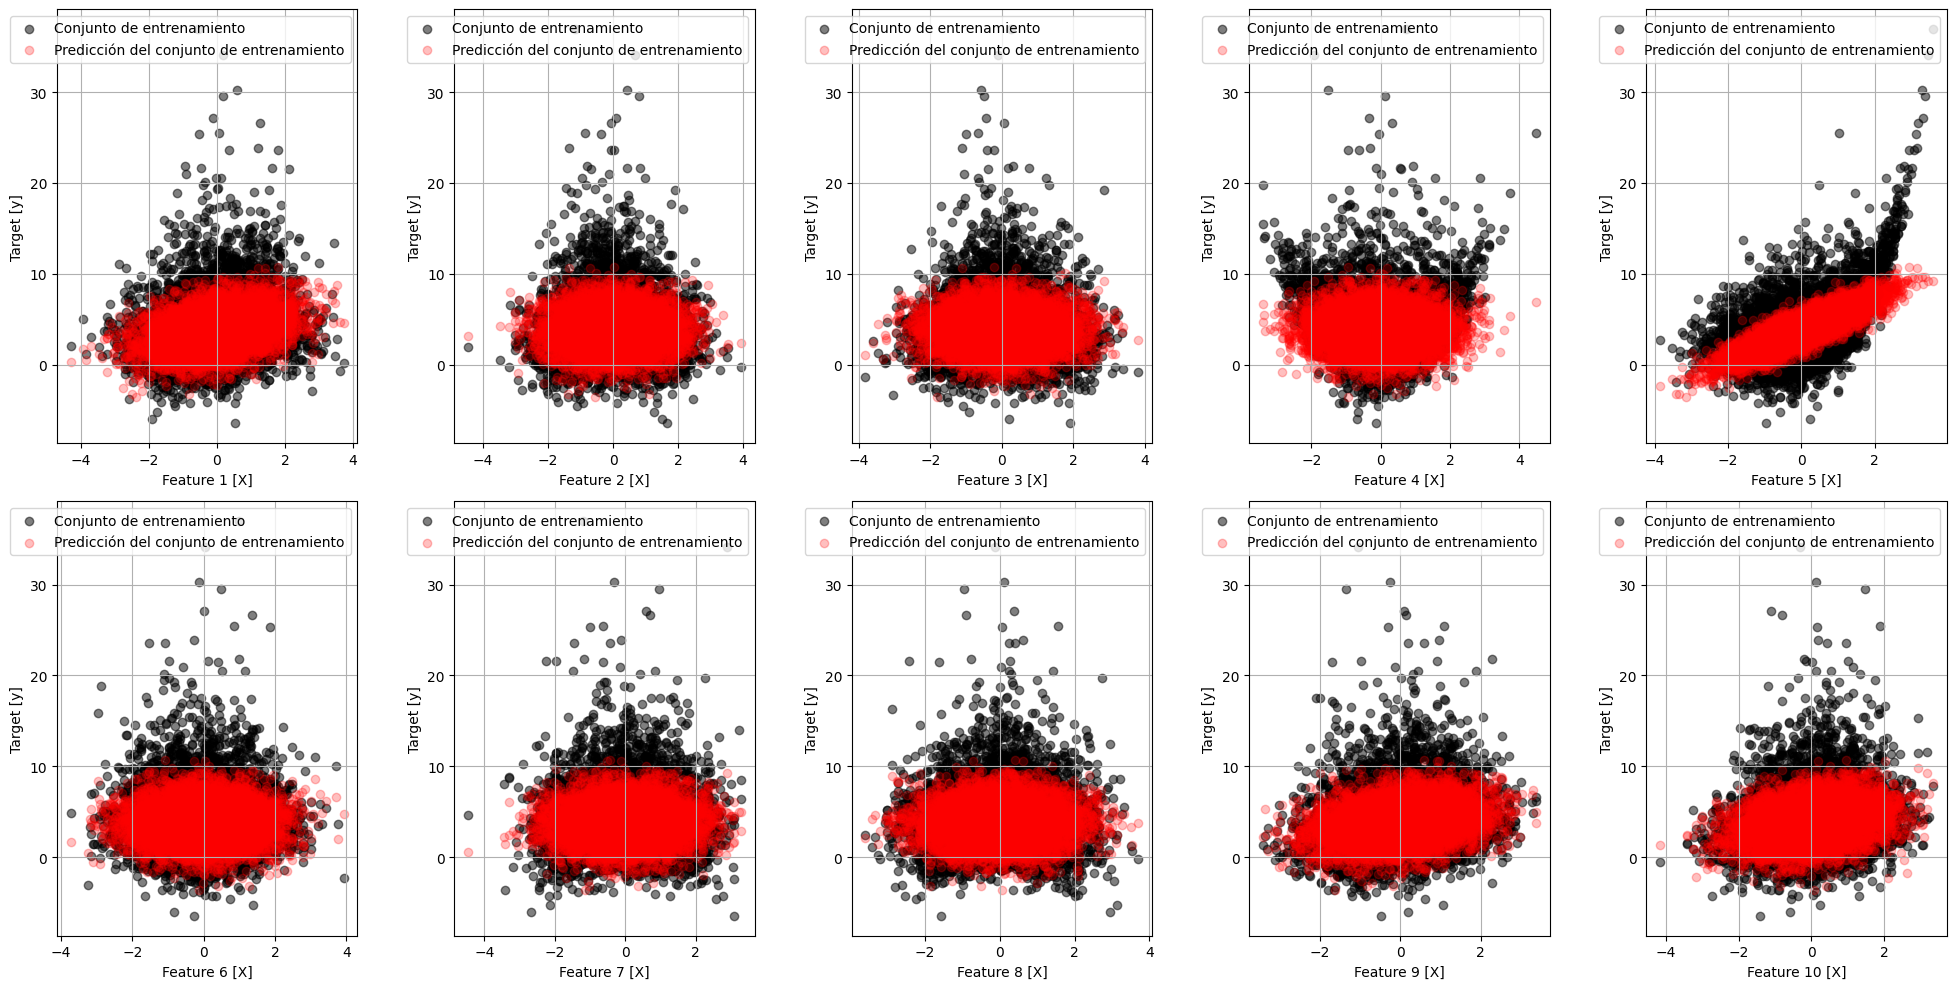

In [25]:
# Cargar los conjuntos de datos
dataset_3 = load_data("dataset_3.pkl")
X = dataset_3["X"]
y = dataset_3["y"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
linear_model = LinearRegressor(learning_rate=0.01, batch_size=100, num_epochs=1000)

# Entrenar el modelo
linear_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación y entrenamiento
y_pred_test = linear_model.predict(X_test)
y_pred_train = linear_model.predict(X_train)

# Evaluar el rendimiento del modelo
linear_mse_test = mean_squared_error(y_test, y_pred_test)
print("Dataset 3 - Linear Regression test MSE:", linear_mse_test)

linear_mse_train = mean_squared_error(y_train, y_pred_train)
print("Dataset 3 - Linear Regression train MSE:", linear_mse_train)

# Plot conjunto de validación
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()
for i in range(X_test.shape[1]):
    ax = axes[i]
    ax.scatter(X_test[:, i], y_test, color='black', alpha = 0.5, label = 'Conjunto de validación')
    ax.scatter(X_test[:, i], y_pred_test, color='red', alpha = 0.25, label = 'Predicción del conjunto de validación')
    ax.legend(loc = 'best')
    ax.set_xlabel(f'Feature {i+1} [X]')
    ax.set_ylabel(f'Target [y]')
    ax.grid(True)
plt.tight_layout()
plt.show()

# Plot conjunto de entrenamiento
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()
for i in range(X_train.shape[1]):
    ax = axes[i]
    ax.scatter(X_train[:, i], y_train, color='black', alpha = 0.5, label = 'Conjunto de entrenamiento')
    ax.scatter(X_train[:, i], y_pred_train, color='red', alpha = 0.25, label = 'Predicción del conjunto de entrenamiento')
    ax.legend(loc = 'best')
    ax.set_xlabel(f'Feature {i+1} [X]')
    ax.set_ylabel(f'Target [y]')
    ax.grid(True)
plt.tight_layout()
plt.show()

- Logistic Classifier

Training: 100%|██████████| 100/100 [00:00<00:00, 240.86it/s]


Dataset 3 - Logistic Classifier test MSE: 18.431888223827794
Dataset 3 - Logistic Classifier train MSE: 18.003408581862967


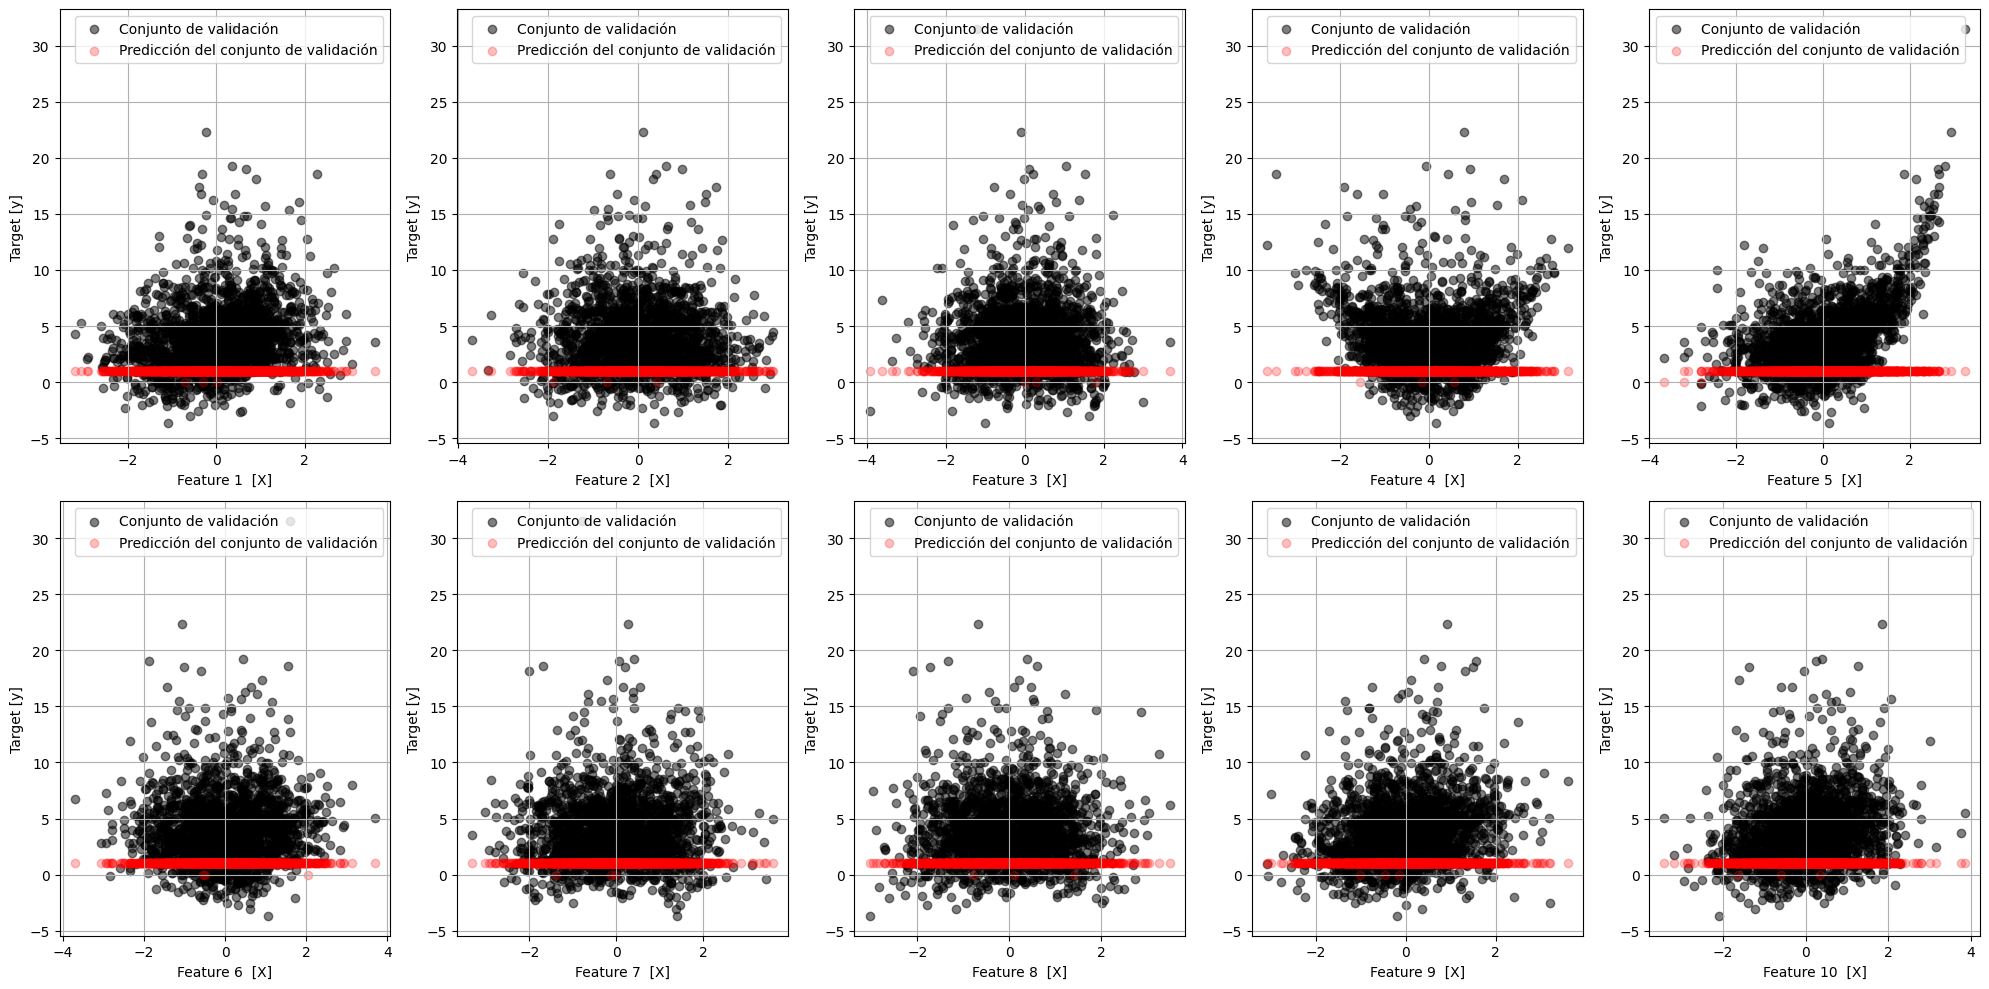

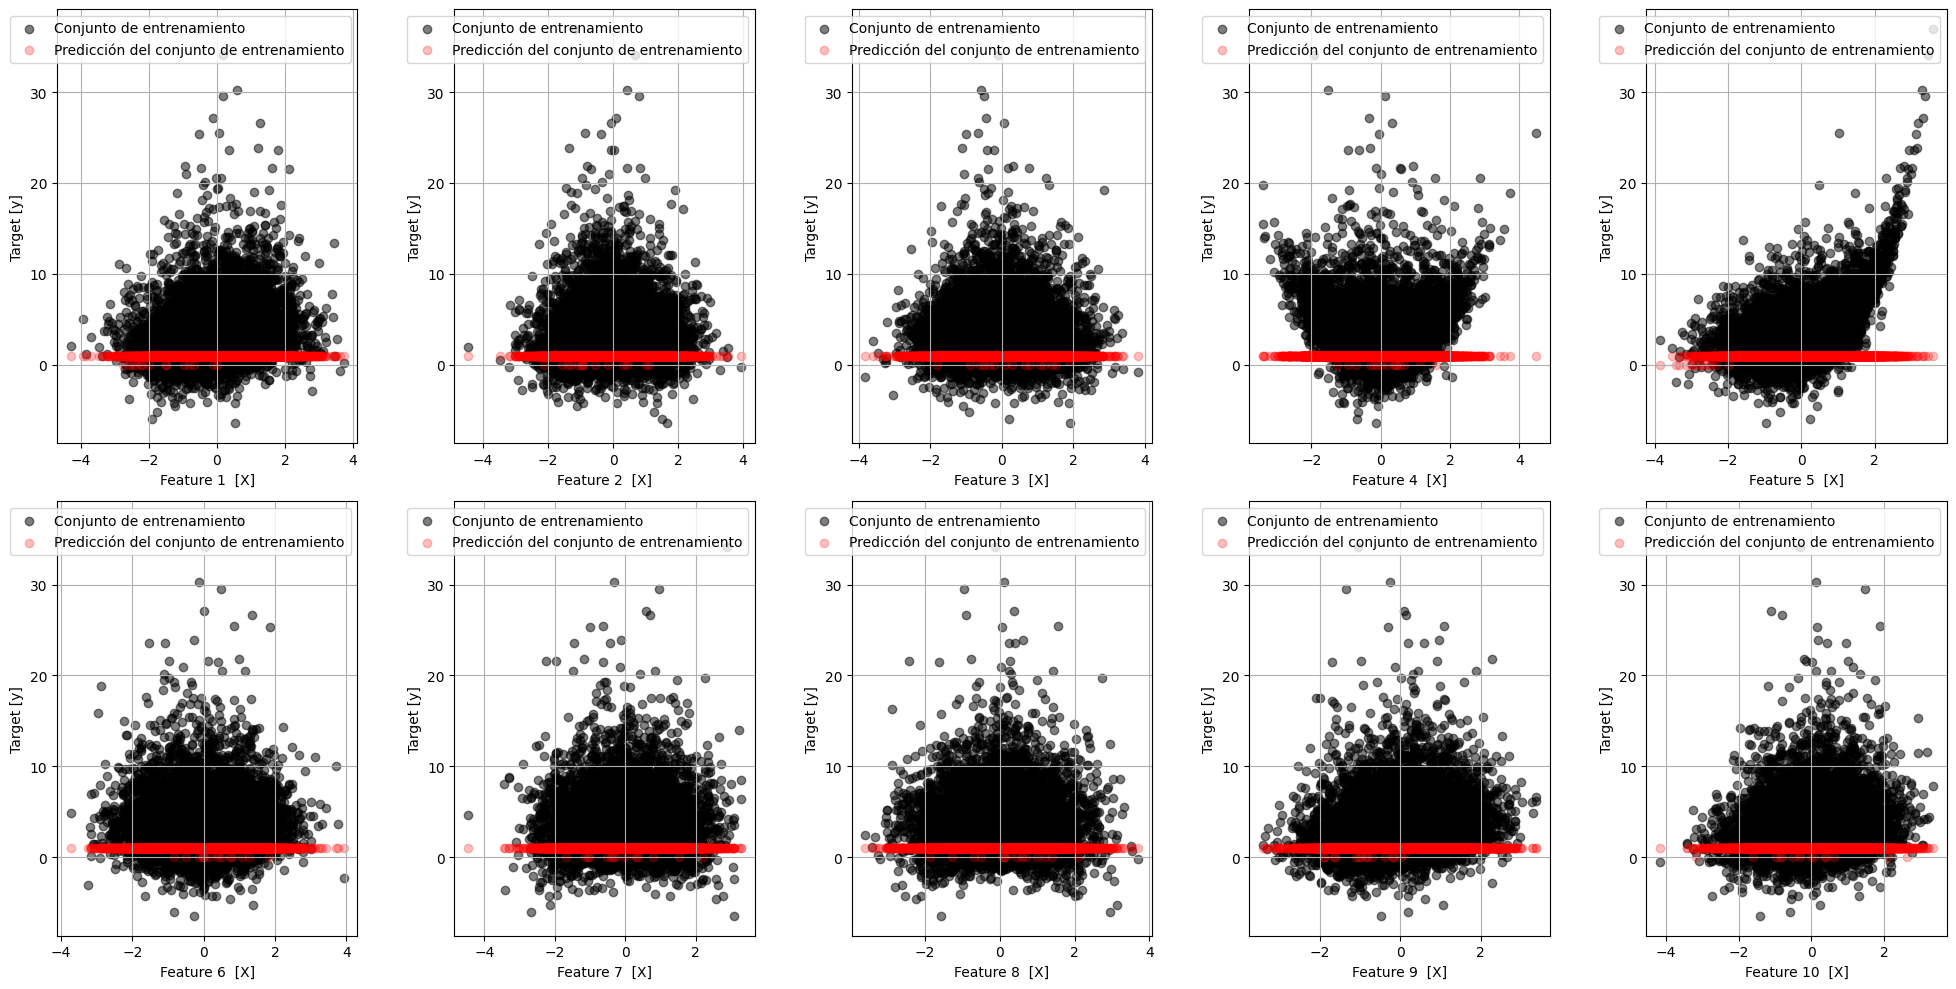

In [26]:
# Cargar los conjuntos de datos
dataset_3 = load_data("dataset_3.pkl")
X = dataset_3["X"]
y = dataset_3["y"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
logistic_model = LogisticClassifier(learning_rate=0.01, batch_size=100, num_epochs=1000)

# Entrenar el modelo
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación y entrenamiento
y_pred_test = logistic_model.predict(X_test)
y_pred_train = logistic_model.predict(X_train)

# Evaluar el rendimiento del modelo
logistic_mse = mean_squared_error(y_test, y_pred_test)
print("Dataset 3 - Logistic Classifier test MSE:", logistic_mse)

logistic_mse = mean_squared_error(y_train, y_pred_train)
print("Dataset 3 - Logistic Classifier train MSE:", logistic_mse)

# Plot conjunto de validación
num_rows = 2  
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()
for i in range(X_test.shape[1]):
    ax = axes[i]
    ax.scatter(X_test[:, i], y_test, color='black', alpha = 0.5, label = 'Conjunto de validación')
    ax.scatter(X_test[:, i], y_pred_test, color='red', alpha = 0.25, label = 'Predicción del conjunto de validación')
    ax.legend(loc = 'best')
    ax.set_xlabel(f'Feature {i+1}  [X]')
    ax.set_ylabel(f'Target [y]')
    ax.grid(True)
plt.tight_layout()
plt.show()

# Plot conjunto de entrenamiento
num_rows = 2  
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()
for i in range(X_train.shape[1]):
    ax = axes[i]
    ax.scatter(X_train[:, i], y_train, color='black', alpha = 0.5, label = 'Conjunto de entrenamiento')
    ax.scatter(X_train[:, i], y_pred_train, color='red', alpha = 0.25, label = 'Predicción del conjunto de entrenamiento')
    ax.legend(loc = 'best')
    ax.set_xlabel(f'Feature {i+1}  [X]')
    ax.set_ylabel(f'Target [y]')
    ax.grid(True)
plt.tight_layout()
plt.show()

- GradientBoostingEstimator

100%|██████████| 100/100 [09:08<00:00,  5.48s/it]


Dataset 3 - GradientBoostingEstimator test MSE : 2.447185926951873
Dataset 3 - GradientBoostingEstimator train MSE : 2.1273386849823517


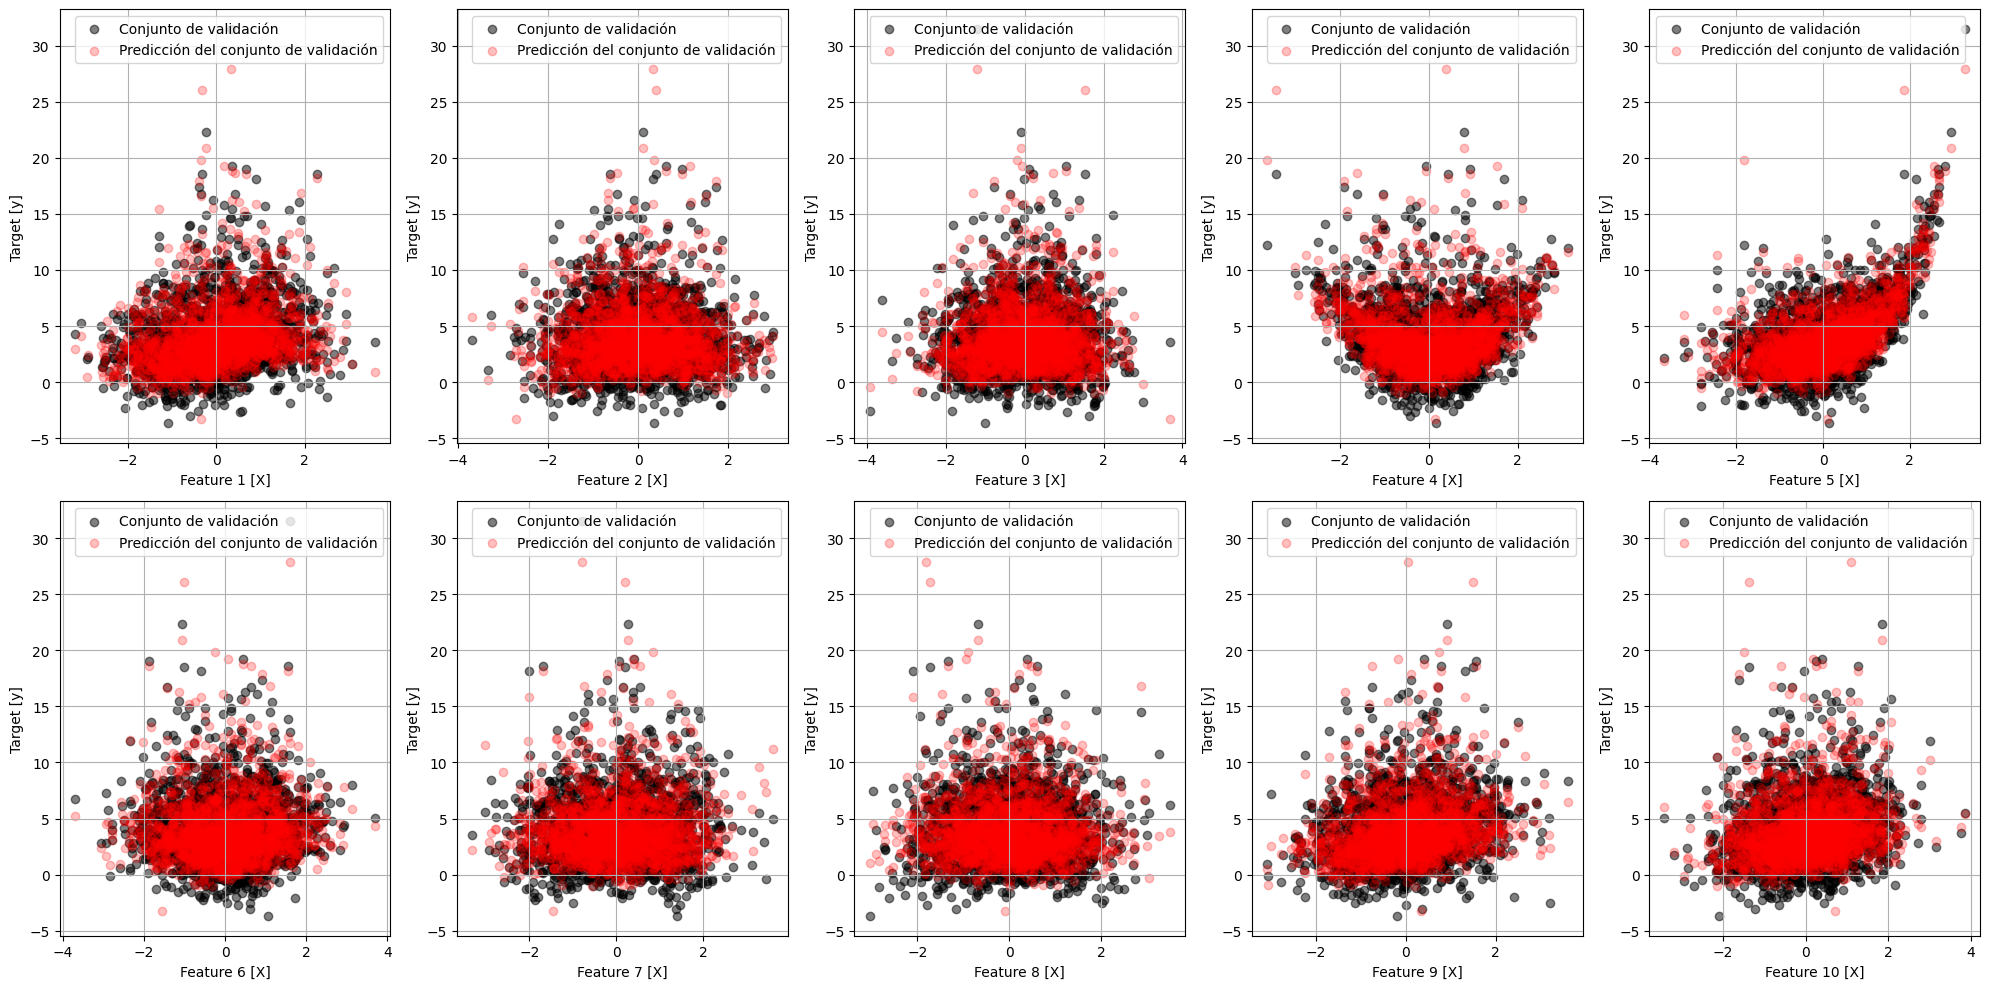

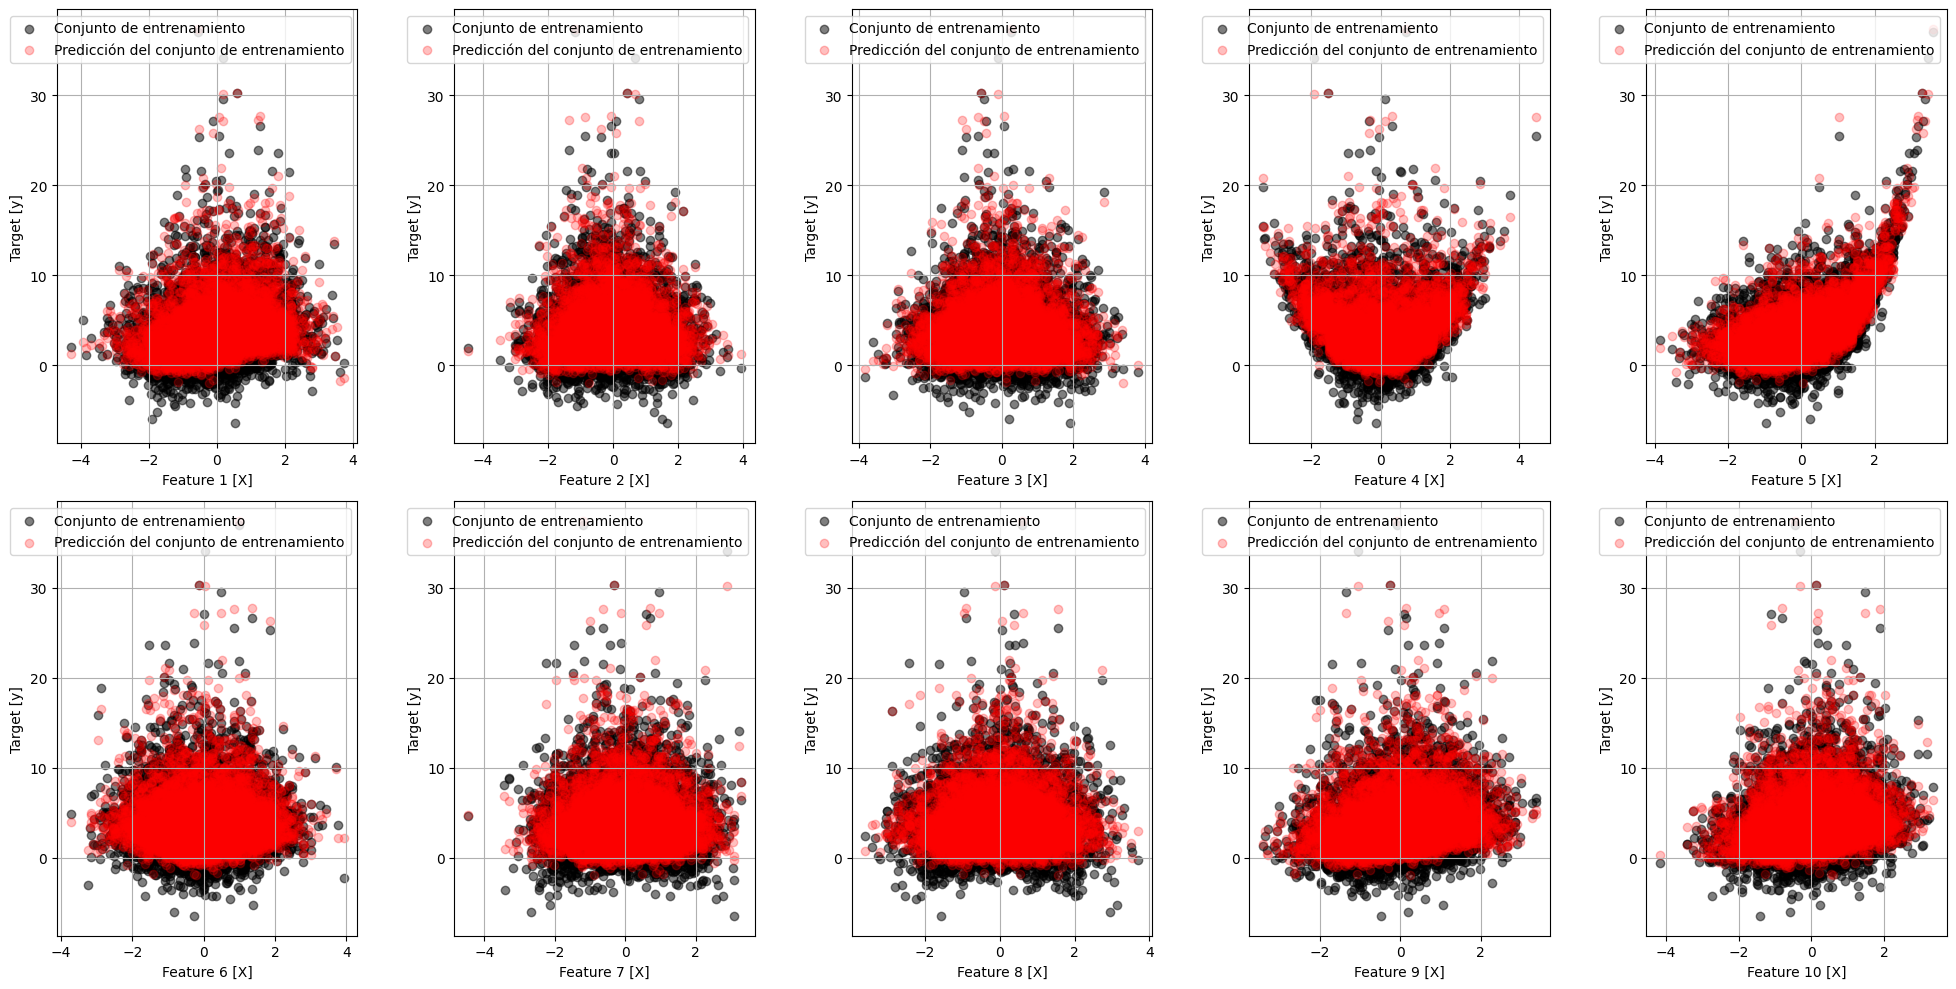

In [31]:
# Cargar los conjuntos de datos
dataset_3 = load_data("dataset_3.pkl")
X = dataset_3["X"]
y = dataset_3["y"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
tree_model = GradientBoostingEstimator(n_estimators=100, learning_rate=1, model_class=TreeStumpRegressor, model_kwargs = {})

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación y entrenamiento
tree_predictions_test = tree_model.predict(X_test)
tree_predictions_train = tree_model.predict(X_train)

# Evaluar el rendimiento del modelo
tree_mse_test = mean_squared_error(y_test, tree_predictions_test)
print("Dataset 3 - GradientBoostingEstimator test MSE :", tree_mse_test)

tree_mse_train = mean_squared_error(y_train, tree_predictions_train)
print("Dataset 3 - GradientBoostingEstimator train MSE :", tree_mse_train)

# Plot conjunto de validación
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()
for i in range(X_test.shape[1]):
    ax = axes[i]
    ax.scatter(X_test[:, i], y_test, color='black', alpha = 0.5, label = 'Conjunto de validación')
    ax.scatter(X_test[:, i], tree_predictions_test, color='red', alpha = 0.25, label = 'Predicción del conjunto de validación')
    ax.legend(loc = 'best')
    ax.set_xlabel(f'Feature {i+1} [X]')
    ax.set_ylabel(f'Target [y]')
    ax.grid(True)
plt.tight_layout()
plt.show()

# Plot conjunto de entrenamiento
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()
for i in range(X_train.shape[1]):
    ax = axes[i]
    ax.scatter(X_train[:, i], y_train, color='black', alpha = 0.5, label = 'Conjunto de entrenamiento')
    ax.scatter(X_train[:, i], tree_predictions_train, color='red', alpha = 0.25, label = 'Predicción del conjunto de entrenamiento')
    ax.legend(loc = 'best')
    ax.set_xlabel(f'Feature {i+1} [X]')
    ax.set_ylabel(f'Target [y]')
    ax.grid(True)
plt.tight_layout()
plt.show()

Tenemos que el modelo GradientBoostingEstimator es el que mejor fittea los datos de Dataset_3 con un MSE aproximadamente 2 veces menor que el modelo LinearRegressor y 6 veces menor que LogisticClassification. Este fenómeno se debe a que GradientBoostingEstimator puede modelar mejor la complejidad del conjunto de datos, capturando relaciones no lineales y ajustándose mejor los datos, en comparación con LinearRegressor donde se asume una relación lineal entre las features y la variable objetivo. 

Por otro lado, en este caso, el conjunto de datos es no binario, por lo que no podemos definir la accuracy entre la predicción y el conjunto de entrenamiento o validación. Por lo tanto, dado que Logistic Classifier nos devuelve probabilidades no aplicamos un threshold a la predicción como para el Dataset_2, y calculamos el mean square error. En particular, para el Dataset_3, vemos que utilizando el modelo Logistic Classifier el MSE es aproximadamente 3 veces más grande que utilizando el modelo LinearRegressor y 6 veces más grande que utilizando GradientBoostingEstimator. En resumen, LogisticClassification no es adecuada para este tipo de datos ya que no son de clasificación binaria, por lo tanto es de esperar que la presición obtenida con el modelo LogisticClassification sea significativamente peor.